# Applied ML : Assignment 1
## SMS Spam Classification
## Rohit Roy | MDS202340

### Preparing the data

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import os
import subprocess

Creating 4 main functions here : 
* `load_data` - to load the full dataset
* `preprocess_data` - encoding ths labels
* `split_data` - splitting into train test and validation
* `save_splits` - saving them into csv files for train.ipynb

In [ ]:
def load_data(file_path):
    """
    Load the SMS spam data from the given file path.
    Assumes the data is in CSV format with columns 'label' and 'message'.
    """
    df = pd.read_csv(file_path, encoding='ISO-8859-1', sep='\t', usecols=[0, 1], names=['label', 'message'])
    return df

def preprocess_data(df):
    """
    Preprocess the data:
    - Convert labels to binary (spam = 1, ham = 0).
    - Remove any unnecessary columns or rows.
    """
    df['label'] = df['label'].map({'spam': 1, 'ham': 0})
    return df

def split_data(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=42):
    """
    Split the data into train, validation, and test sets.
    """
    train_df, temp_df = train_test_split(df, train_size=train_ratio, random_state=random_state)
    val_df, test_df = train_test_split(temp_df, train_size=val_ratio/(val_ratio + test_ratio), random_state=random_state)
    return train_df, val_df, test_df

def save_splits(train_df, val_df, test_df):
    """
    Save the train, validation, and test splits to CSV files.
    """
    train_df.to_csv('train.csv', index=False)
    val_df.to_csv('validation.csv', index=False)
    test_df.to_csv('test.csv', index=False)

In [3]:
file_path = "SMSSpamCollection"
df = load_data(file_path)
df = preprocess_data(df)
train_df, val_df, test_df = split_data(df)
save_splits(train_df, val_df, test_df)

In [5]:
df.to_csv('raw_data.csv', index=False)

In [ ]:
def track_data_with_dvc():
    """
    Track the data files with DVC and push to Google Drive.
    """
    # Add files to DVC
    subprocess.run(["dvc", "add", "raw_data.csv", "train.csv", "validation.csv", "test.csv"])
    # Commit to Git
    subprocess.run(["git", "add", ".gitignore", "raw_data.csv.dvc", "train.csv.dvc", "validation.csv.dvc", "test.csv.dvc"])
    subprocess.run(["git", "commit", "-m", "Track data files with DVC"])
    # Push to Google Drive
    subprocess.run(["dvc", "push"])

def checkout_data_version(version):
    """
    Checkout a specific version of the data using DVC.
    """
    subprocess.run(["git", "checkout", version])
    subprocess.run(["dvc", "checkout"])

Original Data

In [4]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Train Data

In [6]:
train_df.head()

,label,message
708,0,Quite late lar... Ard 12 anyway i wun b drivin...
4338,0,on a Tuesday night r u 4 real
5029,0,Go chase after her and run her over while she'...
4921,0,"G says you never answer your texts, confirm/deny"
2592,0,Still work going on:)it is very small house.


Validation Data

In [7]:
val_df.head()

,label,message
2124,1,+123 Congratulations - in this week's competit...
4155,0,Haf u eaten? Wat time u wan me 2 come?
296,1,T-Mobile customer you may now claim your FREE ...
3752,0,"Haha... Sounds crazy, dunno can tahan anot..."
3162,0,Mystery solved! Just opened my email and he's ...


Test Data

In [8]:
test_df.head()

,label,message
626,0,"Haha good to hear, I'm officially paid and on ..."
3948,0,"Sorry, went to bed early, nightnight"
4417,0,V skint too but fancied few bevies.waz gona go...
1491,0,Cant believe i said so many things to you this...
1204,0,Thanks for understanding. I've been trying to ...


### Some basic EDA

In [11]:
def basic_eda(df):
    """
    Perform basic exploratory data analysis on the text messages.
    """
    # Class Distribution
    print("Class Distribution:")
    print(df['label'].value_counts())
    plt.figure(figsize=(6, 4))
    df['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title('Class Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
    plt.show()

    # Message Length Analysis
    df['message_length'] = df['message'].apply(len)
    print("\nMessage Length Statistics:")
    print(df['message_length'].describe())

    plt.figure(figsize=(8, 6))
    plt.hist(df[df['label'] == 0]['message_length'], bins=50, alpha=0.7, label='Ham', color='skyblue')
    plt.hist(df[df['label'] == 1]['message_length'], bins=50, alpha=0.7, label='Spam', color='orange')
    plt.title('Distribution of Message Lengths')
    plt.xlabel('Message Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Word Frequency Analysis
    spam_words = ' '.join(df[df['label'] == 1]['message']).split()
    ham_words = ' '.join(df[df['label'] == 0]['message']).split()

    print("\nTop 10 Spam Words:")
    print(Counter(spam_words).most_common(10))

    print("\nTop 10 Ham Words:")
    print(Counter(ham_words).most_common(10))

    # Word Clouds
    spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_words))
    ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_words))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(spam_wordcloud, interpolation='bilinear')
    plt.title('Spam Word Cloud')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(ham_wordcloud, interpolation='bilinear')
    plt.title('Ham Word Cloud')
    plt.axis('off')

    plt.show()

Class Distribution:
label
0    4825
1     747
Name: count, dtype: int64


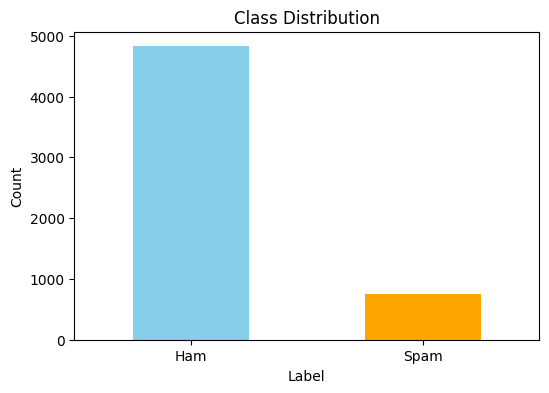


Message Length Statistics:
count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64


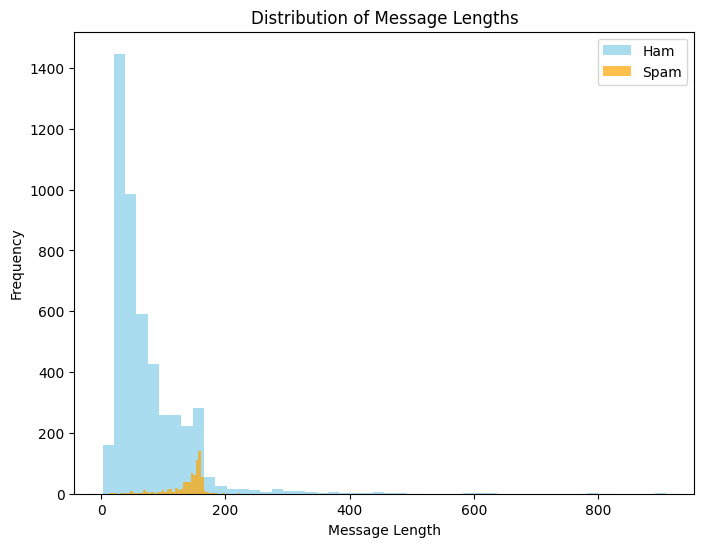


Top 10 Spam Words:
[('to', 607), ('a', 360), ('your', 187), ('call', 185), ('or', 185), ('the', 178), ('2', 169), ('for', 169), ('you', 164), ('is', 143)]

Top 10 Ham Words:
[('to', 1538), ('you', 1462), ('I', 1439), ('the', 1029), ('a', 977), ('i', 742), ('and', 739), ('in', 736), ('u', 651), ('is', 645)]


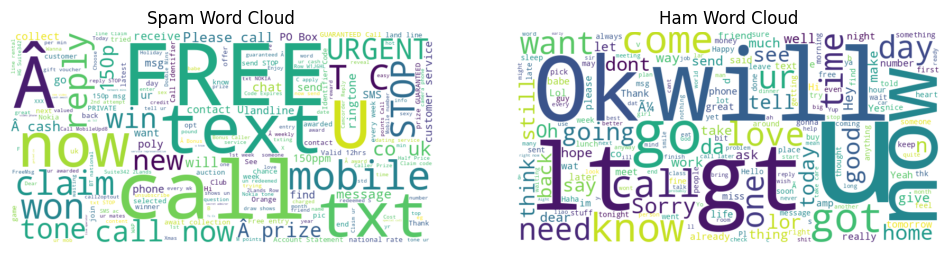

In [12]:
basic_eda(df)